# Workshop - Molecular Representation

## 1. How does a computer read and process molecular information?

![minipic](./img/ibuprofen_2d.png)

### While it's natural for us to conceptualise molecules as fundamentally being bonds between atoms, it can be difficult for a computer to process.

### Alternative ways we can represent molecules can be as IUPAC names, structural formulas, etc

### For the molecule above:

- #### **2-(4-isobutylphenyl)propanoic acid**
- #### **C13H18O2**
- #### **CC(Cc1ccc(cc1)C(C(=O)O)C)C**

### The standard computation input for molecules are typically SMILES string, **S**implified **M**olecular-**I**nput **L**ine-**E**ntry **S**ystem   [More Info](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)

- #### **CC(Cc1ccc(cc1)C(C(=O)O)C)C**

### Systematic line notation to represent chemical structure using characters, alternate representation of the ball and stick diagram above

### **Pros**:
- #### Quick
- #### Easy to store
- #### Relatively robust

### **Cons**:
- #### 2D notation
- #### Not unique
- #### Sparse, many SMILES strings don't correspond to real molecules

### Computers inputs are all based on a **numeric** system, with data being stored in ***bits*** of data, and a single ***byte*** of data contains 8 bits

### With that system in mind you can make 256 different combinations in 1 byte of data.

### For instance:
- #### A : 01000001
- #### B : 01000010
- #### C : 01000011

- #### a : 01100001
- #### b : 01100010
- #### c : 01100011

### the same process applies for symbols!

- #### = : 00111011
- #### [ : 01011011
- #### ] : 01011101

### In that respect, although it is an alphabetical input, SMILES string are inherently processed as numeric inputa by reading the binary bitstring

### With the right python packages, such as rdkit, it becomes possible to recreate a ***molecular graph*** from the SMILES string!

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

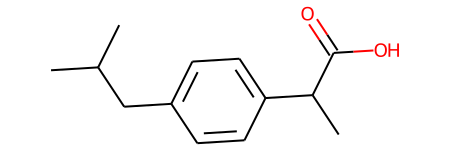

In [27]:
ibuprofen = Chem.MolFromSmiles('CC(Cc1ccc(cc1)C(C(=O)O)C)C')
ibuprofen

#### Alternatives to SMILES strings could include SELFIES, SMARTS, fingerprints.

#### Fingerprints are particularly useful since the length of input data is predetermined meaning the molecules can easily be directly compared

In [35]:
ibuprofen_fps = AllChem.GetMorganFingerprintAsBitVect(ibuprofen, 2)
print(f"Ibuprofen fingerprint: {ibuprofen_fps.ToBitString()}")

Ibuprofen fingerprint: 01000000000000000000000000000000000000000000000000000000000000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000100100000000000000000000000000000000000000000010000000000000000000010000000000000000000000000000000001000000000000000000000

#### But what if you want a 3D input . . .

# 2. 3D Input

![minipic](./img/ibuprofen_3d.png)

### Molecules are 3D in nature existing in different conformations, how would you represent this numerically?

### A simple entry is as positions of atoms in 3D space using **x, y, z** co-ordinates, however that neglects the interaction between atoms! How would you factor in orbital overlap or electronic interactions?

In [60]:
radius = 2
nBits = 1024

In [61]:
bi_ibuprofen = {}
fp_ibuprofen = AllChem.GetMorganFingerprintAsBitVect(ibuprofen, radius=radius, nBits=nBits, bitInfo=bi_ibuprofen)
print(f'Total number of active feature: {len(bi_ibuprofen)}')
print(f'Features present: {list(fp_ibuprofen.GetOnBits())}')

Total number of active feature: 25
Features present: [1, 33, 79, 80, 122, 233, 283, 310, 341, 356, 389, 650, 726, 730, 807, 820, 823, 829, 849, 854, 857, 893, 900, 921, 955]


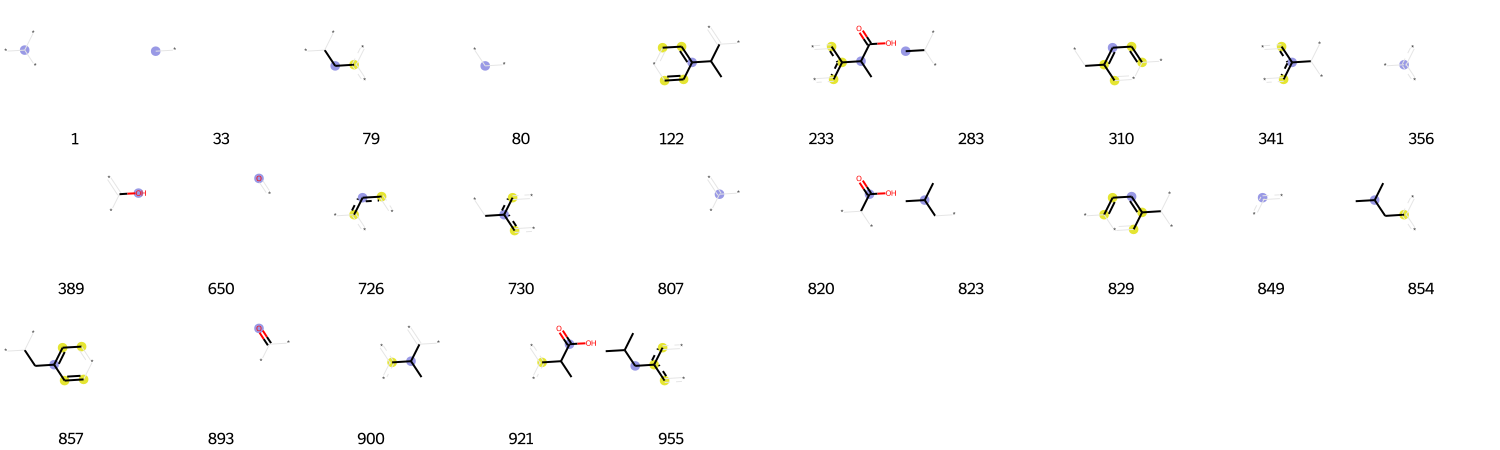

In [62]:
Draw.DrawMorganBits([(ibuprofen, x, bi_ibuprofen) for x in fp_ibuprofen.GetOnBits()], molsPerRow=10, legends=[str(x) for x in fp_ibuprofen.GetOnBits()])

In [63]:
print(f'Bit String: {fp_ibuprofen.ToBitString()}')

Bit String: 0100000000000000000000000000000001000000000000000000000000000000000000000000000110000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000100000000000000000000000000100000000000000000000000000000010000000000000010000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000001000100000000000000000000000000000000000000000000000000000000000000000000000000001000000000000100100000100000000000000000001000010010000000000000000000000000000000000010000001000000000000000000001000000000000000000000000000000000100000000000000000000000000000000

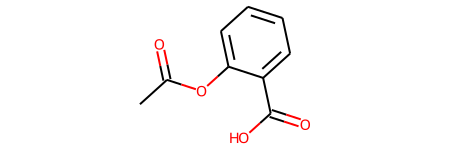

In [64]:
aspirin = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
aspirin

Total number of active feature: 24
Bit String: 00000000000100000000000100000000010000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000100100000000000000000000000000000000010000000000000000000010000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000100000000010000000000000000000010000000000000000000000001000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000010000000000000000000000000000000000000000000100000000000000010000000000000000000000000000000000001000000

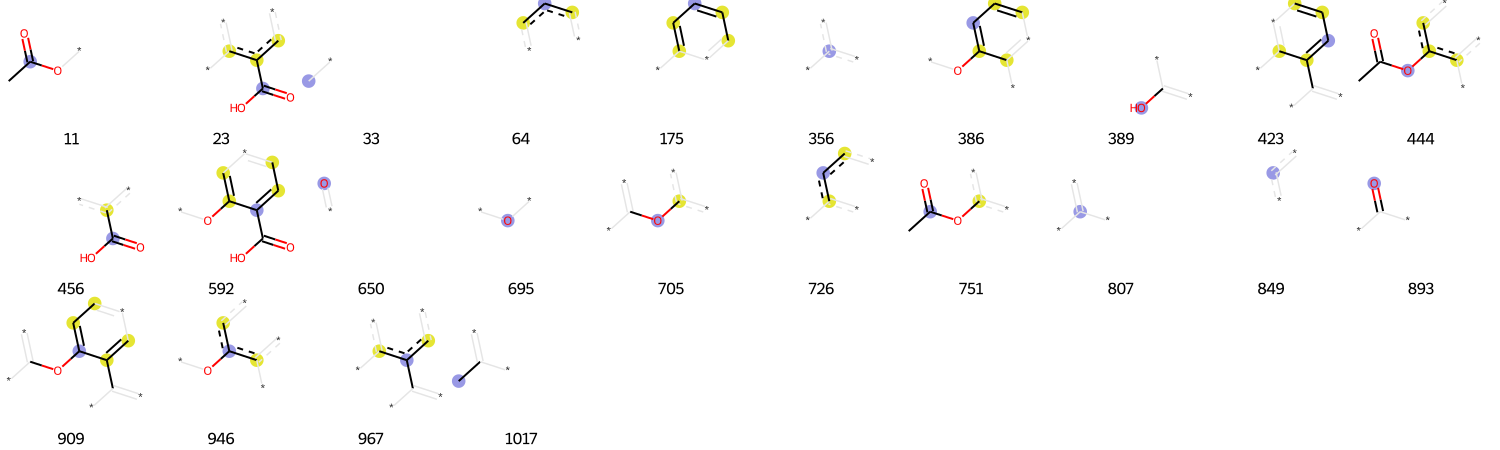

In [65]:
bi_aspirin = {}
fp_aspirin = AllChem.GetMorganFingerprintAsBitVect(aspirin, radius=radius, nBits=nBits, bitInfo=bi_aspirin)
# See what the fingerprint as a bit string looks like:
print(f'Total number of active feature: {len(bi_aspirin)}')
print(f'Bit String: {fp_aspirin.ToBitString()}\nFeatures present: {list(fp_aspirin.GetOnBits())}')
Draw.DrawMorganBits([(aspirin, x, bi_aspirin) for x in bi_aspirin], molsPerRow=10, legends=[str(x) for x in bi_aspirin])

8 common features:


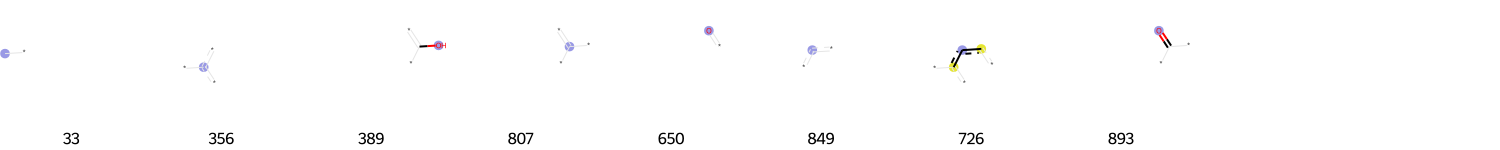

In [66]:
fp_intersection = set(fp_ibuprofen.GetOnBits()) & set(fp_aspirin.GetOnBits())
print(f'{len(fp_intersection)} common features:')
tpls = [(ibuprofen, x, bi_ibuprofen) for x in fp_intersection]
Draw.DrawMorganBits(tpls, molsPerRow=10, legends=[str(x) for x in fp_intersection])

In [67]:
fp_union = set(fp_ibuprofen.GetOnBits()) | set(fp_aspirin.GetOnBits())
print(f'{len(fp_union)} total unique features')

41 total unique features


In [68]:
print(f"Tanimoto similarity: {8/53}")

Tanimoto similarity: 0.1509433962264151


In [69]:
rdkit.DataStructs.FingerprintSimilarity(fp_ibuprofen, fp_aspirin)

0.1951219512195122

In [70]:
imatinib = Chem.MolFromSmiles('CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5')

Total number of active feature: 65
Bit String: 00000000000000100001000000000000010000000000000000000000000001001000000000100000100000000000000000000000000000000000000001000000100000001000000000000000000000000000000000000000000000001000000100000000100000010000100000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000100001000001000000000010000000000000000000010000000000000000000000000000100000000100000000000000000010100000000000000000000000000010000100000000000000000001000000000000000000000000000001000000000000010010001000000000000000010000000000000000000000000000000000000000000000000000000000000100000000100000001100000001000001000000000000000000000000100000000000000000000000000010001000001000010000010000000000000000000100010000000000001001000010010000000000010000000000000000000000010000000000110000010000000000000000000000000100000000000000000100000000000000000000000000000000100000100100000000000000000

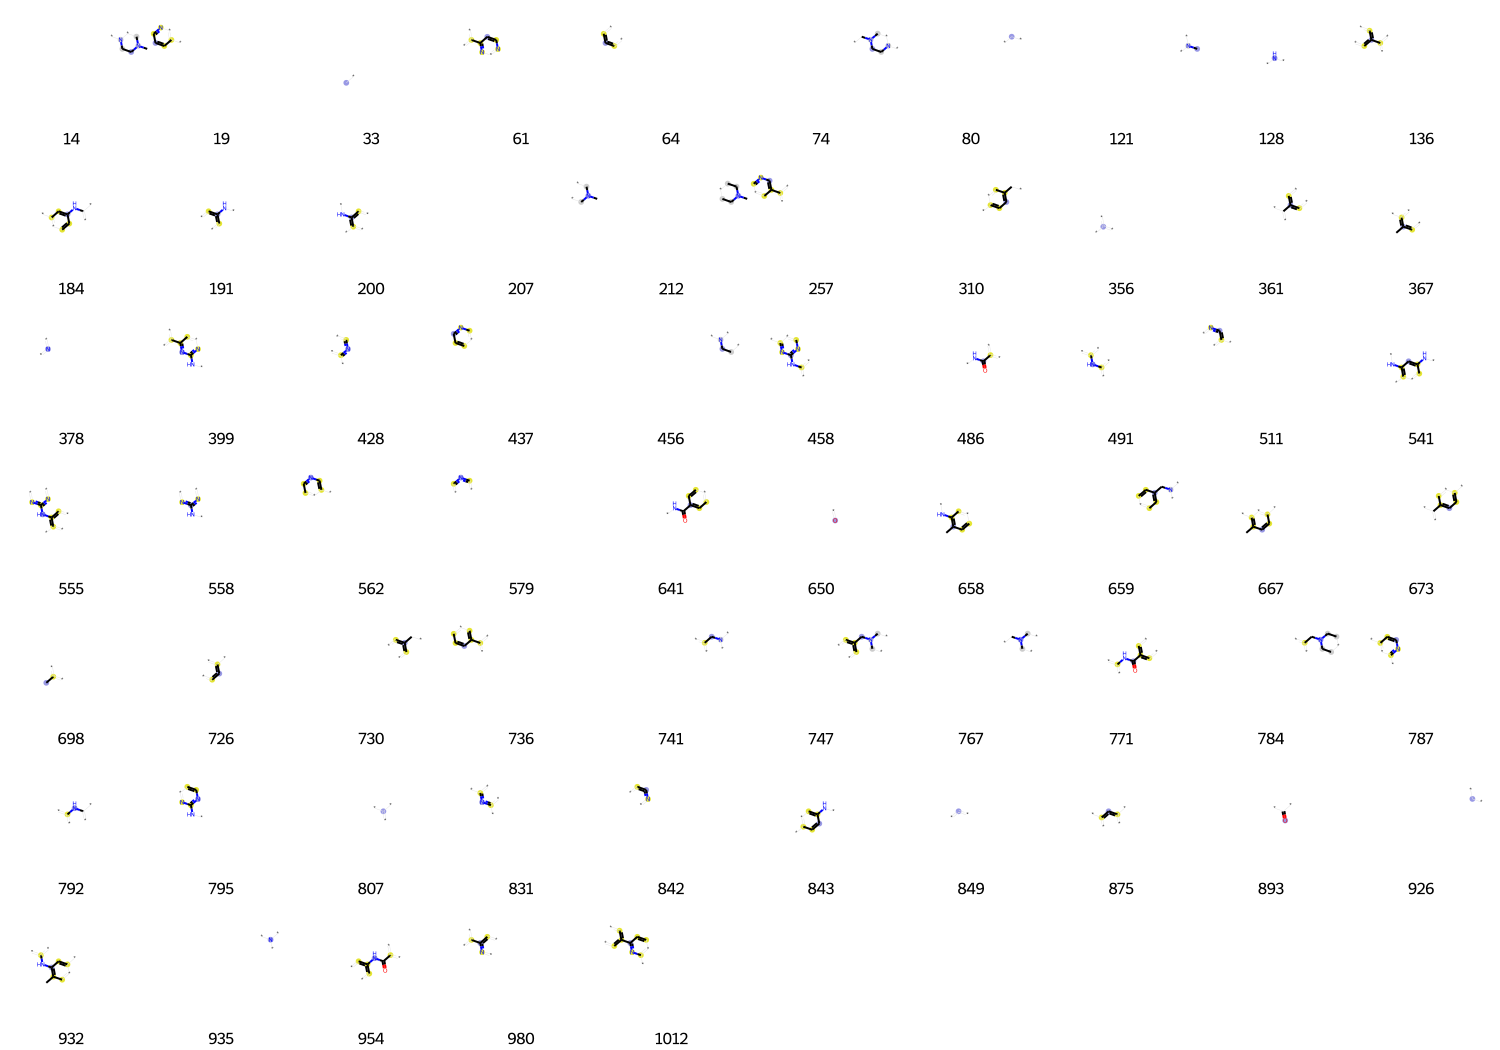

In [71]:
bi_imatinib = {}
fp_imatinib = AllChem.GetMorganFingerprintAsBitVect(imatinib, radius=radius, nBits=nBits, bitInfo=bi_imatinib)
print(f'Total number of active feature: {len(bi_imatinib)}')
print(f'Bit String: {fp_imatinib.ToBitString()}\nFeatures present: {list(fp_imatinib.GetOnBits())}')
Draw.DrawMorganBits([(imatinib, x, bi_imatinib) for x in bi_imatinib], molsPerRow=10, legends=[str(x) for x in bi_imatinib])

In [74]:
bi_imatinib[14]

((19, 2), (21, 2))

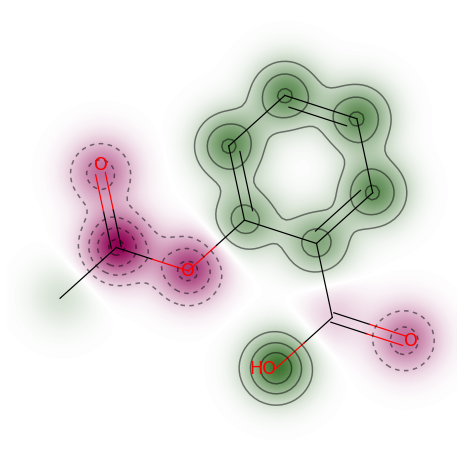

In [79]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import DataStructs

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(ibuprofen, aspirin, lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=1, fpType='count'), metric=DataStructs.TanimotoSimilarity)

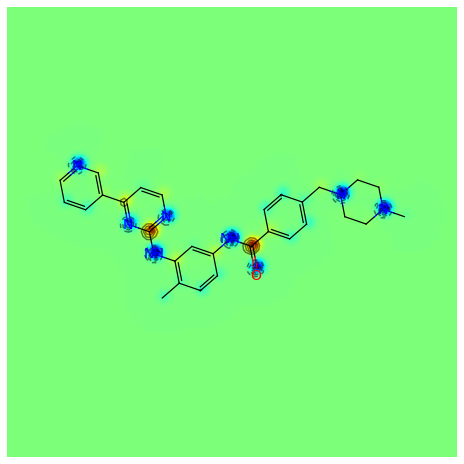

In [81]:
AllChem.ComputeGasteigerCharges(imatinib)
contribs = [imatinib.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(imatinib.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(imatinib, contribs, colorMap='jet', contourLines=10)